# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [134]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.patches import Ellipse

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [6]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [7]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [8]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

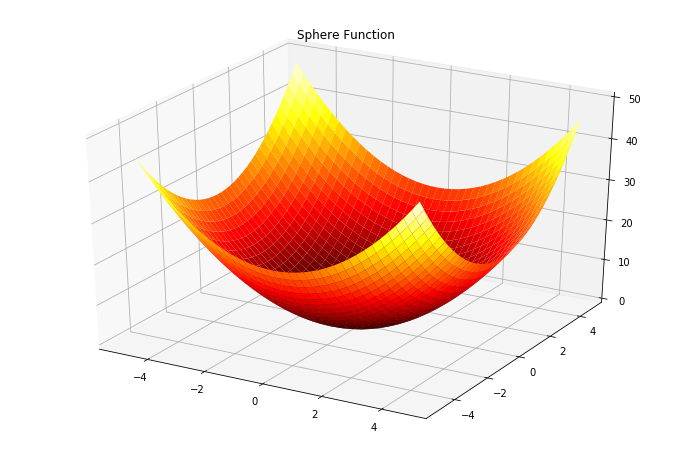

In [9]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

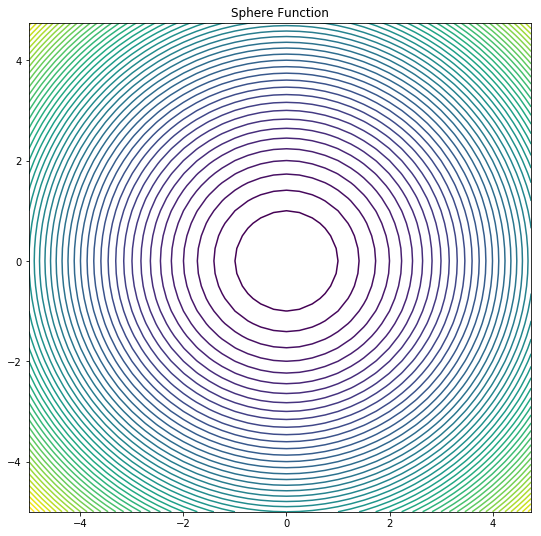

In [10]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

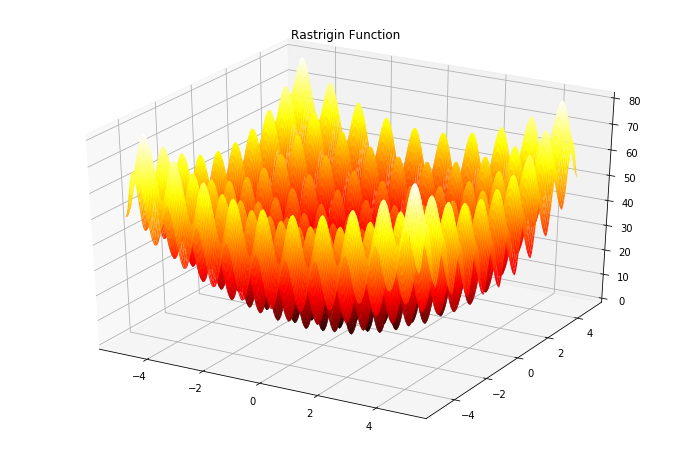

In [11]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

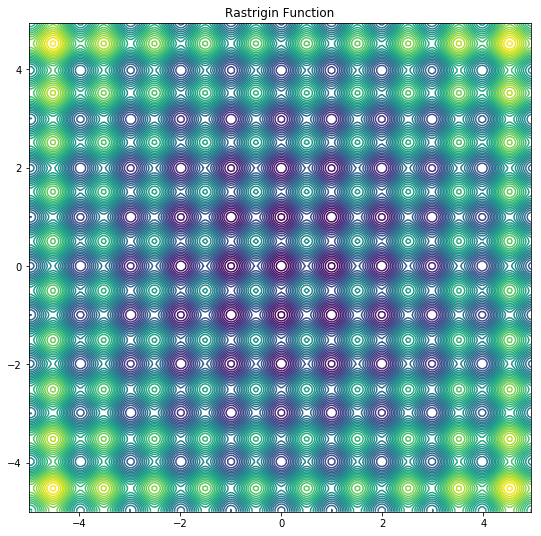

In [12]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

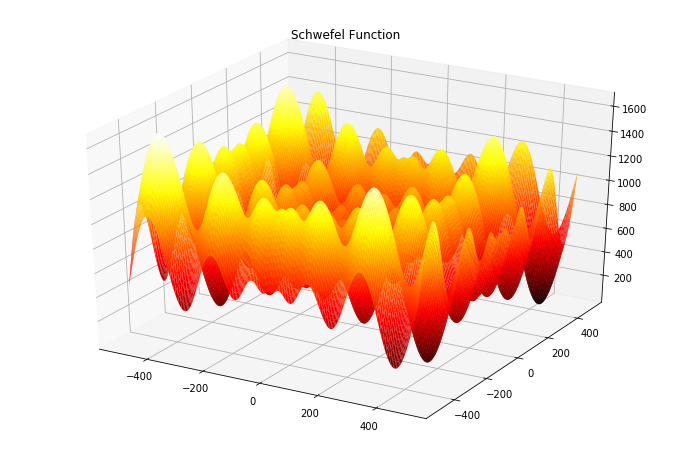

In [13]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

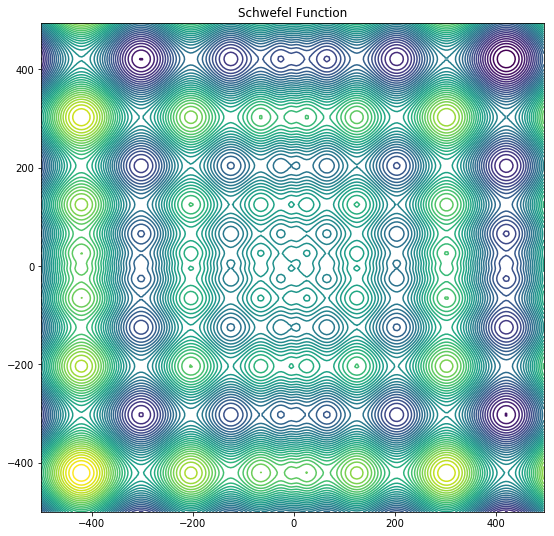

In [14]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

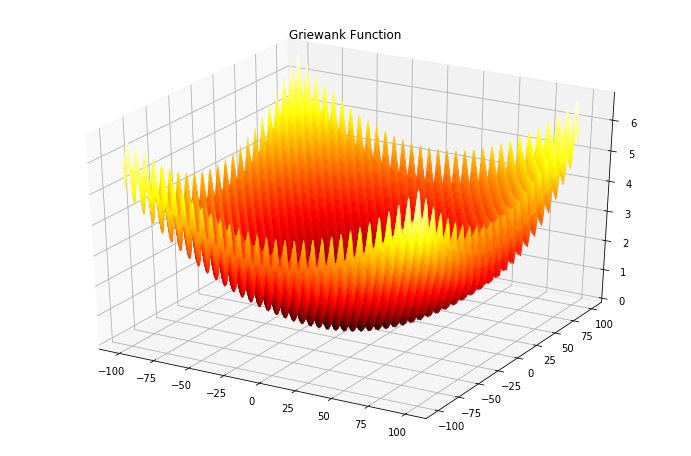

In [15]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

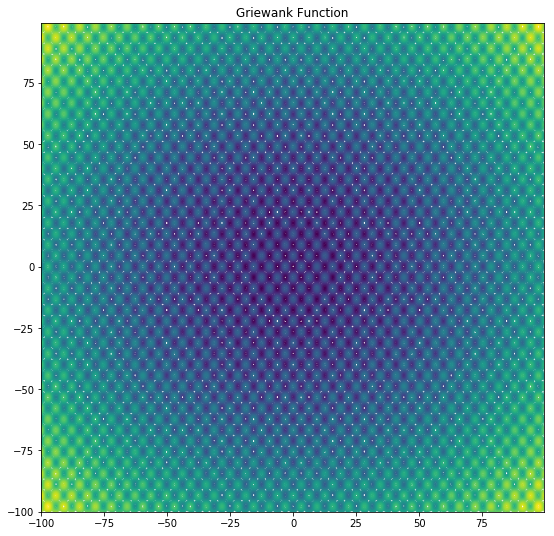

In [16]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [130]:
def count_improving_mutations_ratio(original_individual, mutations, objective_function):
    return np.sum(objective_function(mutations) < objective_function(original_individual)) / mutations.shape[0]

def get_best_objective_function_value(mutations, objective_function):
    return np.max(objective_function(mutations))

def test_mutations(original_individual, mutations, objective_function, d=2, N=250):
    print("Function = {}, d={}, N={}".format(objective_function, d, N))
    print("Improving ratio: {}".format(count_improving_mutations_ratio(original_individual, mutations, objective_function)))
    print("Best solution: {}".format(get_best_objective_function_value(mutations, objective_function)))
    print()

In [131]:
original_individual = np.array([[1, 1]])
N = 250
d = 2

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [132]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)
test_mutations(original_individual, mutations, objective_function_F1a)
test_mutations(original_individual, mutations, objective_function_F6)
test_mutations(original_individual, mutations, objective_function_F7)
test_mutations(original_individual, mutations, objective_function_F8)
test_mutations(original_individual, mutations, objective_function_F1a, d=5)

Function = <function objective_function_F1a at 0x118505620>, d=2, N=250
Improving ratio: 0.5
Best solution: -2.0596881028687433

Function = <function objective_function_F6 at 0x118505950>, d=2, N=250
Improving ratio: 1.0
Best solution: -2.014616437263321

Function = <function objective_function_F7 at 0x1185059d8>, d=2, N=250
Improving ratio: 0.492
Best solution: -835.3224250832967

Function = <function objective_function_F8 at 0x118505598>, d=2, N=250
Improving ratio: 0.528
Best solution: -0.242469283788888

Function = <function objective_function_F1a at 0x118505620>, d=5, N=250
Improving ratio: 0.5
Best solution: -2.0596881028687433



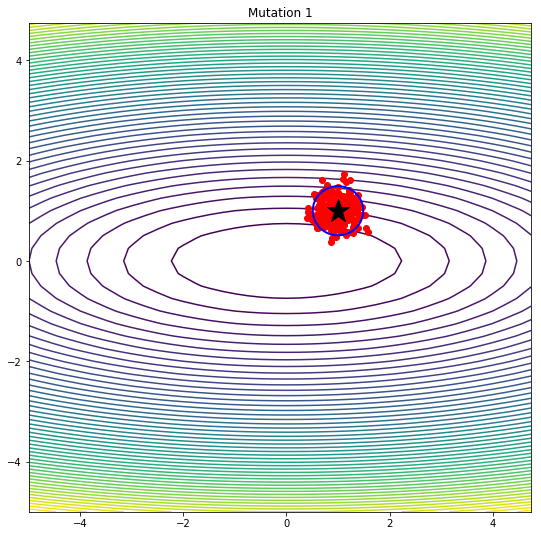

In [135]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
ellipse = Ellipse(xy=(1, 1), width=0.98, height=0.98, edgecolor='b', fc='None', lw=2, zorder=10)
plt.gca().add_patch(ellipse)
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [136]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)
test_mutations(original_individual, mutations, objective_function_F1a)
test_mutations(original_individual, mutations, objective_function_F6)
test_mutations(original_individual, mutations, objective_function_F7)
test_mutations(original_individual, mutations, objective_function_F8)
test_mutations(original_individual, mutations, objective_function_F1a, d=5)

Function = <function objective_function_F1a at 0x118505620>, d=2, N=250
Improving ratio: 0.536
Best solution: -0.4936774318335841

Function = <function objective_function_F6 at 0x118505950>, d=2, N=250
Improving ratio: 0.996
Best solution: -1.024440112281038

Function = <function objective_function_F7 at 0x1185059d8>, d=2, N=250
Improving ratio: 0.476
Best solution: -834.6329855250415

Function = <function objective_function_F8 at 0x118505598>, d=2, N=250
Improving ratio: 0.6
Best solution: -0.1457531076159848

Function = <function objective_function_F1a at 0x118505620>, d=5, N=250
Improving ratio: 0.536
Best solution: -0.4936774318335841



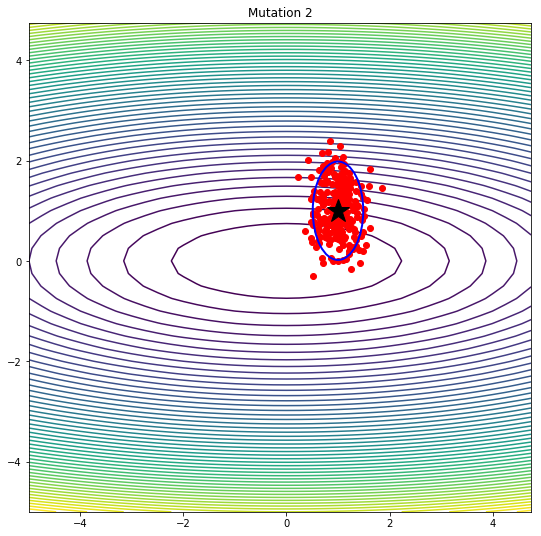

In [137]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
ellipse = Ellipse(xy=(1, 1), width=0.98, height=1.96, edgecolor='b', fc='None', lw=2, zorder=10)
plt.gca().add_patch(ellipse)
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [138]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
R = np.linalg.cholesky(S).T
mutations = original_individual + np.dot(np.random.randn(N, d), R)
test_mutations(original_individual, mutations, objective_function_F1a)
test_mutations(original_individual, mutations, objective_function_F6)
test_mutations(original_individual, mutations, objective_function_F7)
test_mutations(original_individual, mutations, objective_function_F8)
test_mutations(original_individual, mutations, objective_function_F1a, d=5)

Function = <function objective_function_F1a at 0x118505620>, d=2, N=250
Improving ratio: 0.508
Best solution: -0.053063601827449985

Function = <function objective_function_F6 at 0x118505950>, d=2, N=250
Improving ratio: 1.0
Best solution: -2.004815857883301

Function = <function objective_function_F7 at 0x1185059d8>, d=2, N=250
Improving ratio: 0.504
Best solution: -832.7496414979987

Function = <function objective_function_F8 at 0x118505598>, d=2, N=250
Improving ratio: 0.496
Best solution: -0.007436302943129358

Function = <function objective_function_F1a at 0x118505620>, d=5, N=250
Improving ratio: 0.508
Best solution: -0.053063601827449985



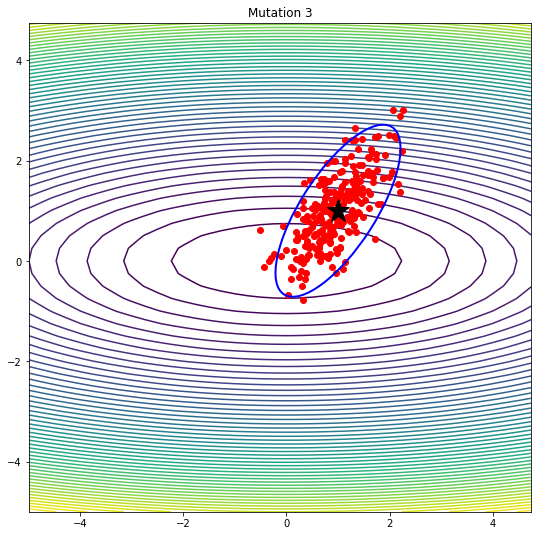

In [143]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
ellipse = Ellipse(xy=(1, 1), width=3.94, height=1.46, angle=58, edgecolor='b', fc='None', lw=2, zorder=10)
plt.gca().add_patch(ellipse)
plt.show()

## Przykładowa strategia ewolucyjna

In [162]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1, min_val=None, max_val=None, mutations_model="NORMAL"):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        old_children_population_solutions = children_population_solutions.copy()
        
        if mutations_model == "NORMAL":
            children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)
        elif mutations_model['type'] == "CONST_SIGMA":
            children_population_solutions = children_population_solutions + mutations_model['sigma'] * np.random.randn(number_of_offspring, chromosome_length)
        elif mutations_model['type'] == "DECREASING_SIGMA":
            children_population_solutions = children_population_solutions + mutations_model['sigma'] * np.random.randn(number_of_offspring, chromosome_length) * np.exp(-t / mutations_model['rate'])
            
        # constrain children to min-max range
        if min_val is not None and max_val is not None:
            for i in range(children_population_solutions.shape[0]):
                for j in range(children_population_solutions.shape[1]):
                    while children_population_solutions[i, j] < min_val or children_population_solutions[i, j] > max_val:
                        children_population_solutions[i, j] = old_children_population_solutions[i, j] + children_population_sigmas[i, j] * np.random.randn()
            
        
        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -5884.47120495, mean score = -26452.04459395.
Iteration 0010 : best score = -25.97735301, mean score = -219.34472024.
Iteration 0020 : best score = -0.05436424, mean score = -0.58606796.
Iteration 0030 : best score = -0.00015630, mean score = -0.00122628.
Iteration 0040 : best score = -0.00000032, mean score = -0.00000216.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


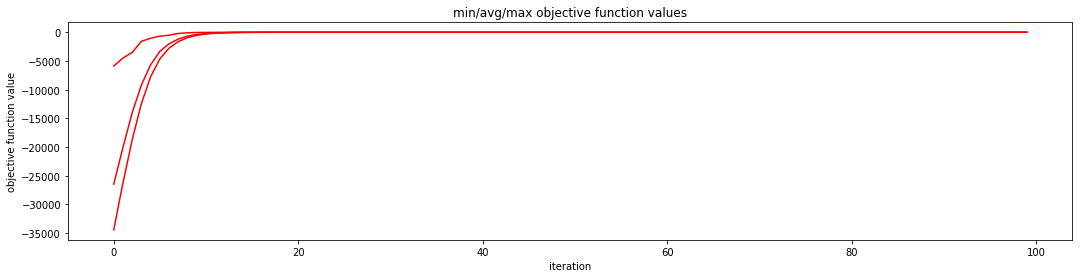

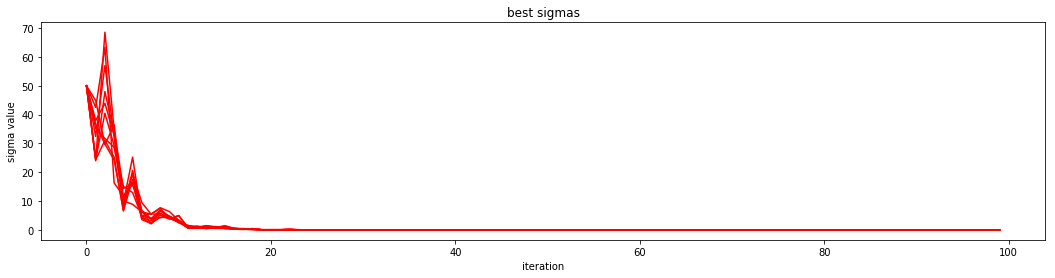

In [39]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -22104.54905871, mean score = -59378.53836601.
Iteration 0010 : best score = -782.09882580, mean score = -2443.02664567.
Iteration 0020 : best score = -29.42130495, mean score = -68.10401089.
Iteration 0030 : best score = -0.52753967, mean score = -1.89861549.
Iteration 0040 : best score = -0.01867257, mean score = -0.04807989.
Iteration 0050 : best score = -0.00051371, mean score = -0.00128828.
Iteration 0060 : best score = -0.00001308, mean score = -0.00003168.
Iteration 0070 : best score = -0.00000028, mean score = -0.00000082.
Iteration 0080 : best score = -0.00000001, mean score = -0.00000002.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


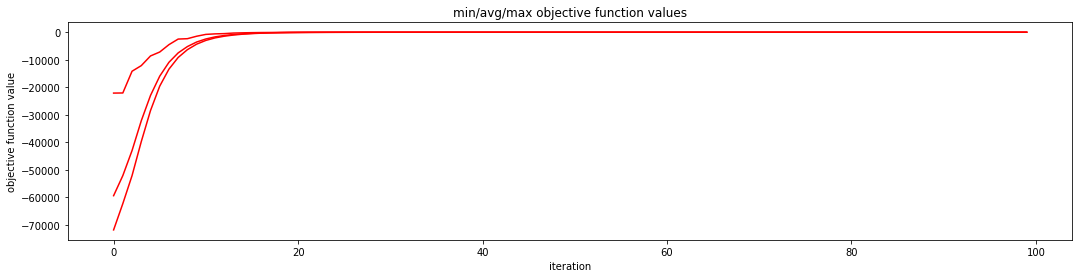

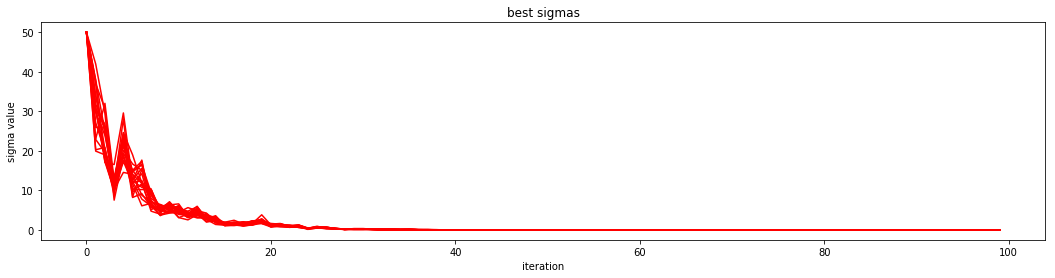

In [42]:
d = 20
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -85071.15324086, mean score = -124160.72077974.
Iteration 0010 : best score = -11903.80603021, mean score = -18465.34836905.
Iteration 0020 : best score = -1133.97367848, mean score = -1842.47251198.
Iteration 0030 : best score = -124.10626478, mean score = -175.17849315.
Iteration 0040 : best score = -8.47032906, mean score = -16.30635924.
Iteration 0050 : best score = -1.02279853, mean score = -1.51416793.
Iteration 0060 : best score = -0.08774752, mean score = -0.13630863.
Iteration 0070 : best score = -0.00760109, mean score = -0.01226384.
Iteration 0080 : best score = -0.00067946, mean score = -0.00109256.
Iteration 0090 : best score = -0.00006342, mean score = -0.00009594.
Iteration 0100 : best score = -0.00000556, mean score = -0.00000845.
Iteration 0110 : best score = -0.00000052, mean score = -0.00000077.
Iteration 0120 : best score = -0.00000005, mean score = -0.00000007.
Iteration 0130 : best score = -0.00000000, mean score = -0.00000001.
Iterat

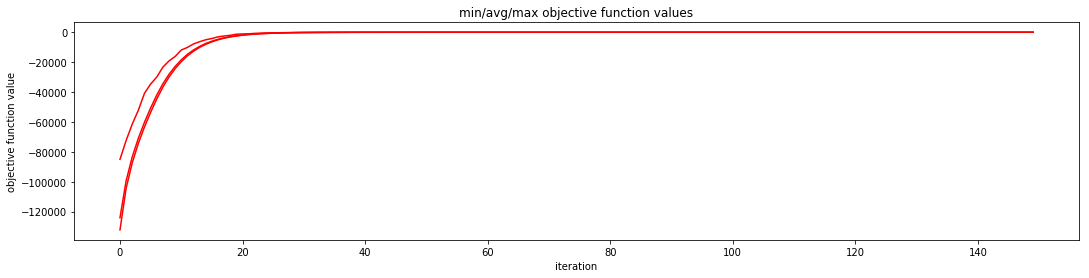

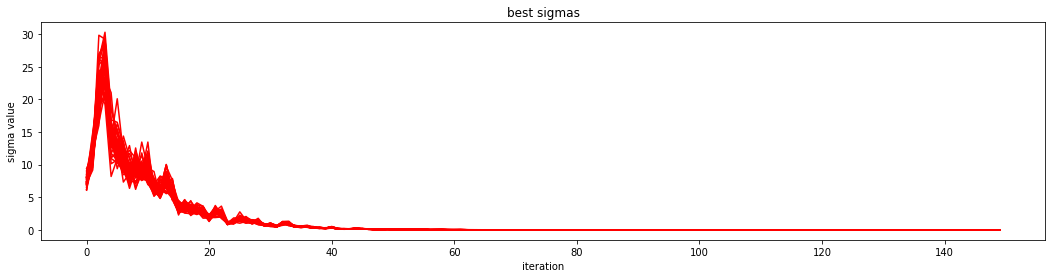

In [58]:
d = 50
N = 10000
T = 150


best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 5*N, 2, 10, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -201061.59968379, mean score = -248876.80183022.
Iteration 0010 : best score = -40053.01068844, mean score = -48630.77077251.
Iteration 0020 : best score = -5923.53726873, mean score = -7419.62945882.
Iteration 0030 : best score = -882.14943845, mean score = -1107.36253126.
Iteration 0040 : best score = -132.98067088, mean score = -161.96020228.
Iteration 0050 : best score = -19.49711757, mean score = -23.88526496.
Iteration 0060 : best score = -2.69435725, mean score = -3.41414107.
Iteration 0070 : best score = -0.38276231, mean score = -0.49956921.
Iteration 0080 : best score = -0.05972427, mean score = -0.07429809.
Iteration 0090 : best score = -0.00875955, mean score = -0.01121928.
Iteration 0100 : best score = -0.00141778, mean score = -0.00172241.
Iteration 0110 : best score = -0.00022879, mean score = -0.00028029.
Iteration 0120 : best score = -0.00003649, mean score = -0.00004504.
Iteration 0130 : best score = -0.00000580, mean score = -0.00000699.

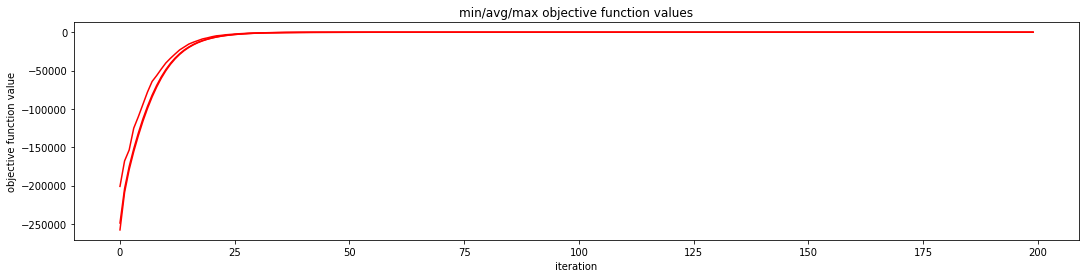

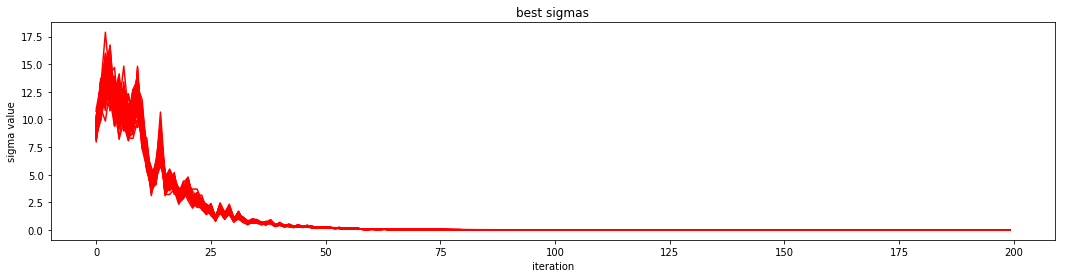

In [61]:
d = 100
N = 10000
T = 200


best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 20*N, 2, 10, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -5574.19323368, mean score = -26145.97015612.
Iteration 0010 : best score = -83.61640965, mean score = -299.93174304.
Iteration 0020 : best score = -29.63701514, mean score = -75.16178120.
Iteration 0030 : best score = -23.06035944, mean score = -61.16516396.
Iteration 0040 : best score = -17.92832808, mean score = -55.15831566.
Iteration 0050 : best score = -15.97014674, mean score = -50.10125291.
Iteration 0060 : best score = -0.12231177, mean score = -0.90410668.
Iteration 0070 : best score = -0.00027450, mean score = -0.00200249.
Iteration 0080 : best score = -0.00000056, mean score = -0.00000368.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000001.


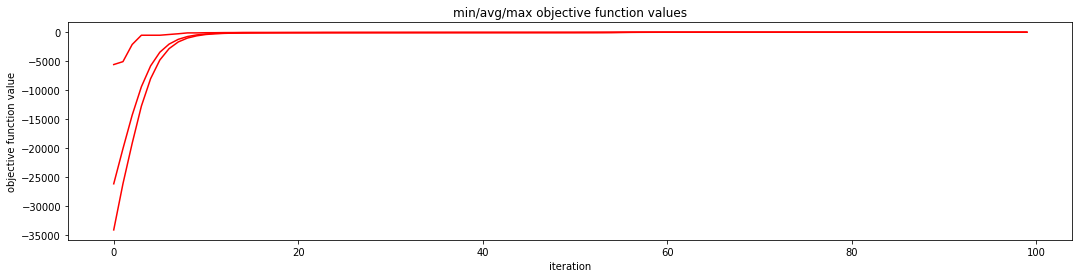

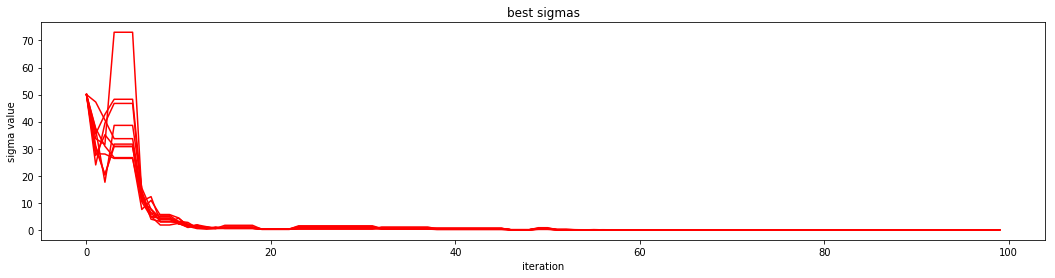

In [64]:
d = 10
N = 5000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19103.37819391, mean score = -46007.67595612.
Iteration 0010 : best score = -2196.69655111, mean score = -5629.27222480.
Iteration 0020 : best score = -282.50577867, mean score = -502.16764489.
Iteration 0030 : best score = -111.50426005, mean score = -207.89758056.
Iteration 0040 : best score = -91.76696979, mean score = -173.50388511.
Iteration 0050 : best score = -66.13040374, mean score = -158.25768309.
Iteration 0060 : best score = -45.36197454, mean score = -135.92787568.
Iteration 0070 : best score = -19.99691512, mean score = -20.55481168.
Iteration 0080 : best score = -19.90011039, mean score = -19.90306895.
Iteration 0090 : best score = -19.89920619, mean score = -19.89927064.
Iteration 0100 : best score = -19.89918201, mean score = -19.89918402.
Iteration 0110 : best score = -19.89918117, mean score = -19.89918124.
Iteration 0120 : best score = -19.89918114, mean score = -19.89918115.
Iteration 0130 : best score = -19.89918114, mean score = -19

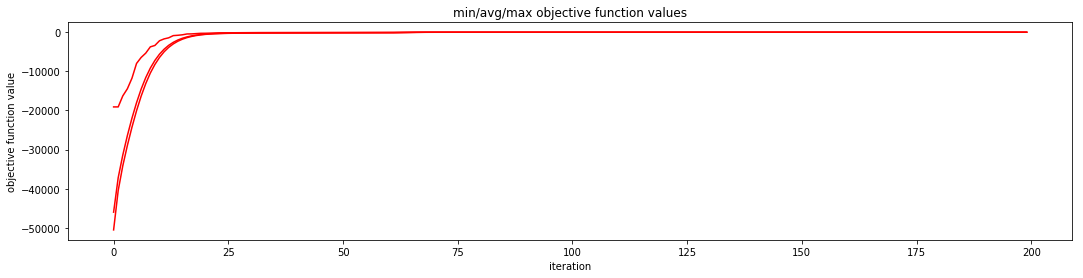

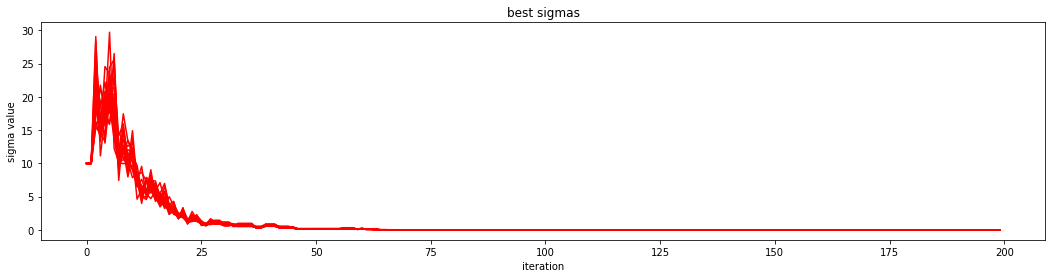

In [74]:
d = 20
N = 50000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 10, 10.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -80764.17954868, mean score = -158977.35239486.
Iteration 0010 : best score = -17604.19012746, mean score = -27844.26107512.
Iteration 0020 : best score = -5302.63978991, mean score = -7647.14254916.
Iteration 0030 : best score = -2012.73556315, mean score = -2720.85310742.
Iteration 0040 : best score = -966.45237015, mean score = -1262.99207843.
Iteration 0050 : best score = -614.35302782, mean score = -830.19619577.
Iteration 0060 : best score = -540.74039301, mean score = -689.51678023.
Iteration 0070 : best score = -454.11089990, mean score = -618.00245679.
Iteration 0080 : best score = -206.96949875, mean score = -232.56296421.
Iteration 0090 : best score = -199.63542465, mean score = -200.14141434.
Iteration 0100 : best score = -199.15758179, mean score = -199.23660560.
Iteration 0110 : best score = -199.04051564, mean score = -199.06171156.
Iteration 0120 : best score = -199.00613870, mean score = -199.01270394.
Iteration 0130 : best score = -198.99

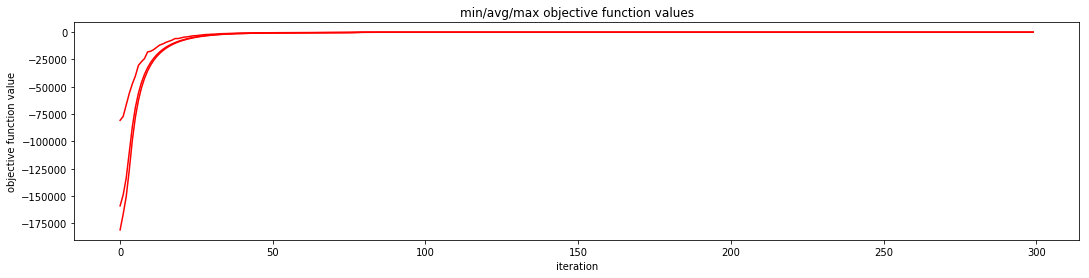

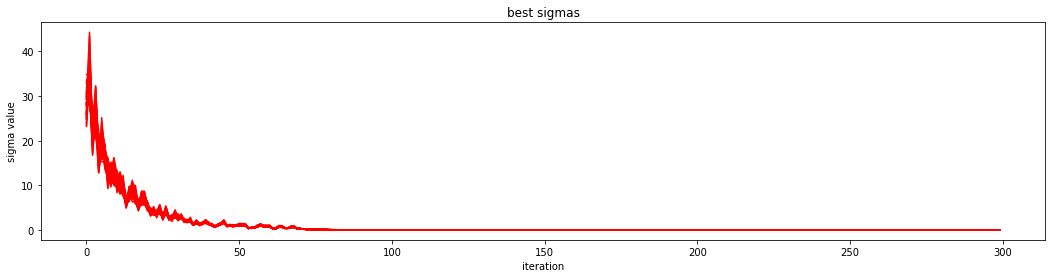

In [78]:
d = 50
N = 50000
T = 300

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 10, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -218672.13154711, mean score = -327749.82929250.
Iteration 0010 : best score = -86121.36051086, mean score = -111481.12778907.
Iteration 0020 : best score = -41980.99189194, mean score = -51723.46921741.
Iteration 0030 : best score = -24783.43041499, mean score = -29085.03187804.
Iteration 0040 : best score = -14886.53270930, mean score = -17312.82464590.
Iteration 0050 : best score = -9294.00992891, mean score = -10668.87207081.
Iteration 0060 : best score = -5799.33126208, mean score = -6794.17998756.
Iteration 0070 : best score = -3946.70715544, mean score = -4542.07103610.
Iteration 0080 : best score = -2899.49309708, mean score = -3258.25950789.
Iteration 0090 : best score = -2252.27653001, mean score = -2538.15715570.
Iteration 0100 : best score = -1862.99788666, mean score = -2142.05349695.
Iteration 0110 : best score = -1629.02812671, mean score = -1885.46467271.
Iteration 0120 : best score = -1016.48349716, mean score = -1218.33651556.
Iteration 0

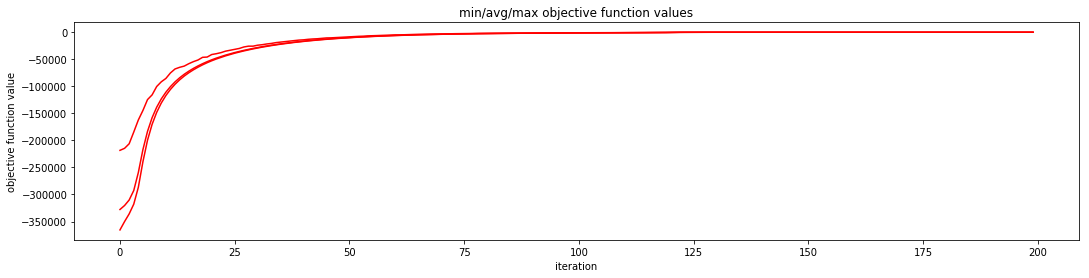

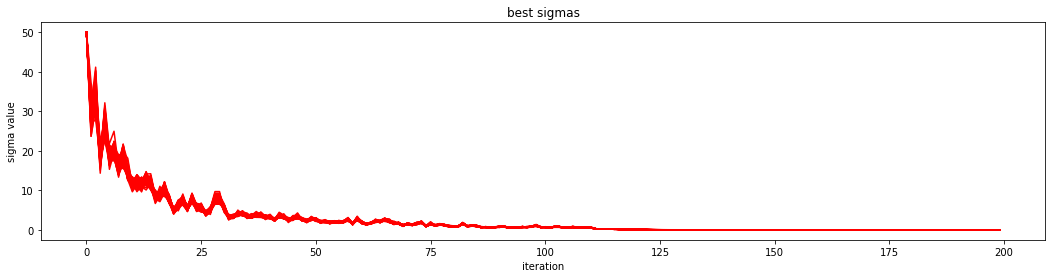

In [80]:
d = 100
N = 50000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 10, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -1.65257185, mean score = -7.64741146.
Iteration 0010 : best score = -0.76897568, mean score = -1.05290502.
Iteration 0020 : best score = -0.07789102, mean score = -0.48458100.
Iteration 0030 : best score = -0.00022485, mean score = -0.00163641.
Iteration 0040 : best score = -0.00000080, mean score = -0.00000547.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000002.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


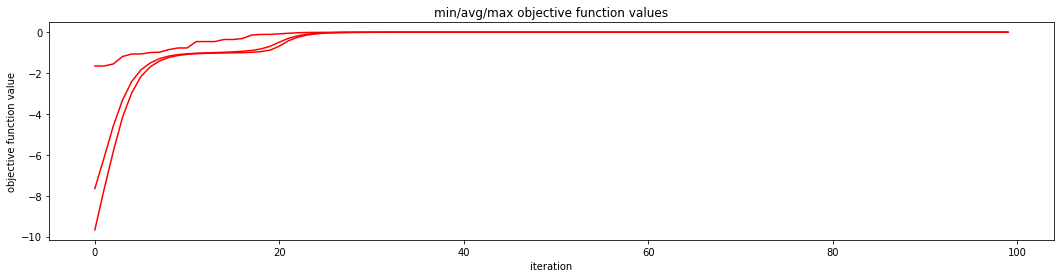

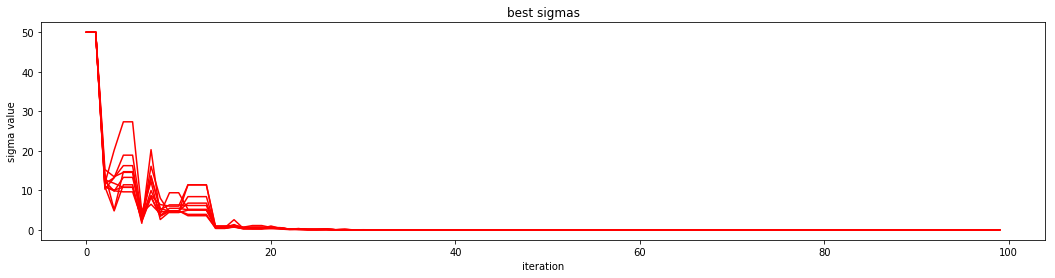

In [82]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -7.09950358, mean score = -14.92790124.
Iteration 0010 : best score = -1.06049334, mean score = -1.14525527.
Iteration 0020 : best score = -0.12043467, mean score = -0.24405781.
Iteration 0030 : best score = -0.00557183, mean score = -0.01142532.
Iteration 0040 : best score = -0.00014009, mean score = -0.00047469.
Iteration 0050 : best score = -0.00000394, mean score = -0.00001055.
Iteration 0060 : best score = -0.00000007, mean score = -0.00000017.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


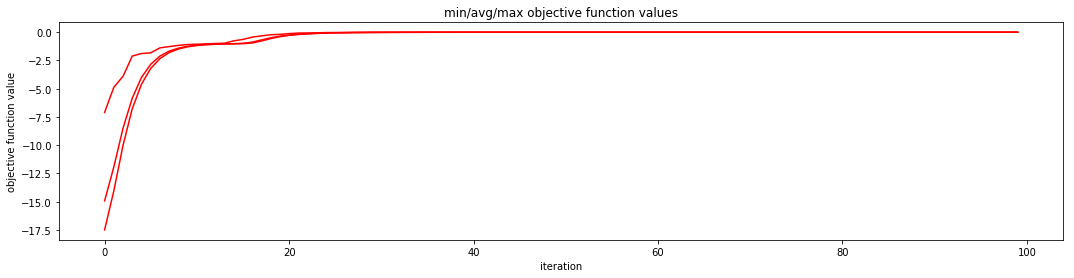

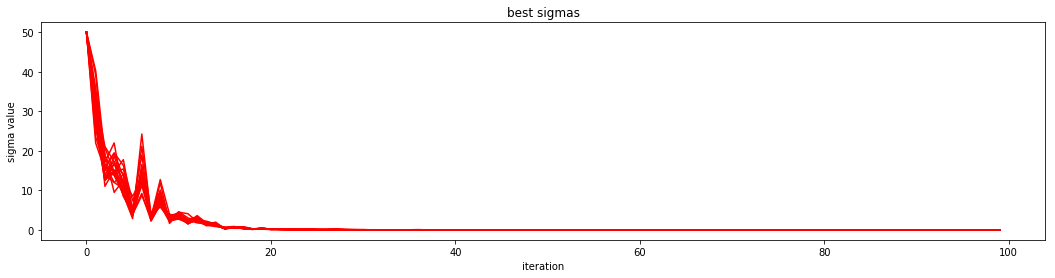

In [84]:
d = 20
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 4*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -25.93098483, mean score = -40.23156373.
Iteration 0010 : best score = -2.97242890, mean score = -3.95479559.
Iteration 0020 : best score = -1.15750050, mean score = -1.22071375.
Iteration 0030 : best score = -0.87998812, mean score = -0.98805128.
Iteration 0040 : best score = -0.26660689, mean score = -0.32183408.
Iteration 0050 : best score = -0.09179639, mean score = -0.11484326.
Iteration 0060 : best score = -0.03945436, mean score = -0.04568533.
Iteration 0070 : best score = -0.01667954, mean score = -0.01954024.
Iteration 0080 : best score = -0.00625675, mean score = -0.00769963.
Iteration 0090 : best score = -0.00231040, mean score = -0.00274836.
Iteration 0100 : best score = -0.00087383, mean score = -0.00104357.
Iteration 0110 : best score = -0.00031804, mean score = -0.00037940.
Iteration 0120 : best score = -0.00011377, mean score = -0.00013354.
Iteration 0130 : best score = -0.00003631, mean score = -0.00004385.
Iteration 0140 : best score = -0

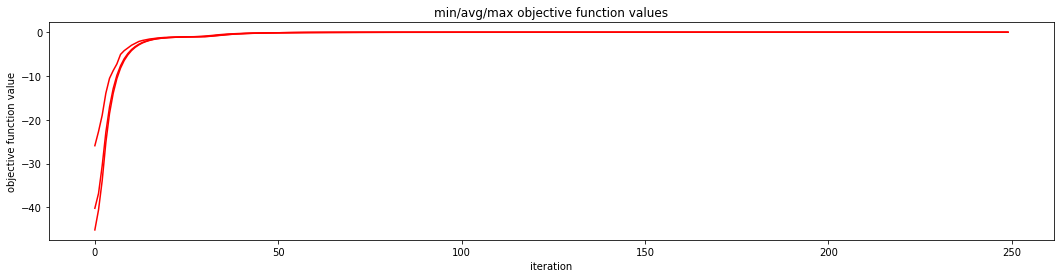

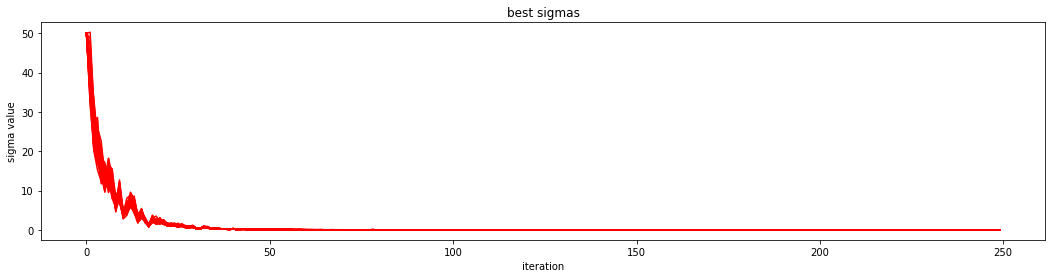

In [89]:
d = 50
N = 2000
T = 250

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 5*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -59.31230914, mean score = -81.79443582.
Iteration 0010 : best score = -10.26745608, mean score = -12.19834832.
Iteration 0020 : best score = -2.78185579, mean score = -3.16922287.
Iteration 0030 : best score = -1.37450893, mean score = -1.45966748.
Iteration 0040 : best score = -1.08461238, mean score = -1.10141461.
Iteration 0050 : best score = -0.68801766, mean score = -0.76462979.
Iteration 0060 : best score = -0.36681495, mean score = -0.39531531.
Iteration 0070 : best score = -0.21454332, mean score = -0.22897046.
Iteration 0080 : best score = -0.12829604, mean score = -0.13761365.
Iteration 0090 : best score = -0.07707666, mean score = -0.08354826.
Iteration 0100 : best score = -0.04776995, mean score = -0.05123249.
Iteration 0110 : best score = -0.02901746, mean score = -0.03153668.
Iteration 0120 : best score = -0.01817519, mean score = -0.01949227.
Iteration 0130 : best score = -0.01091812, mean score = -0.01178152.
Iteration 0140 : best score = 

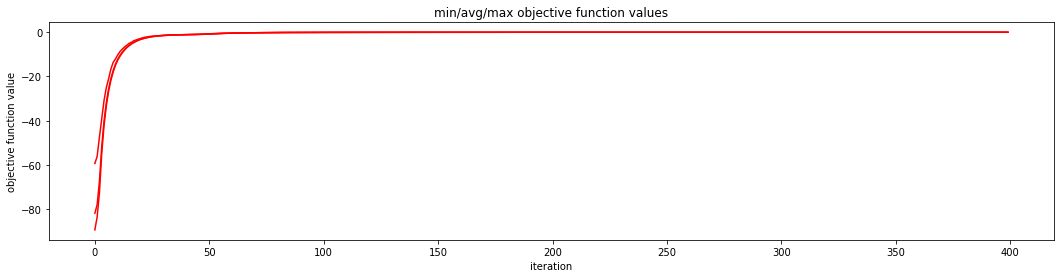

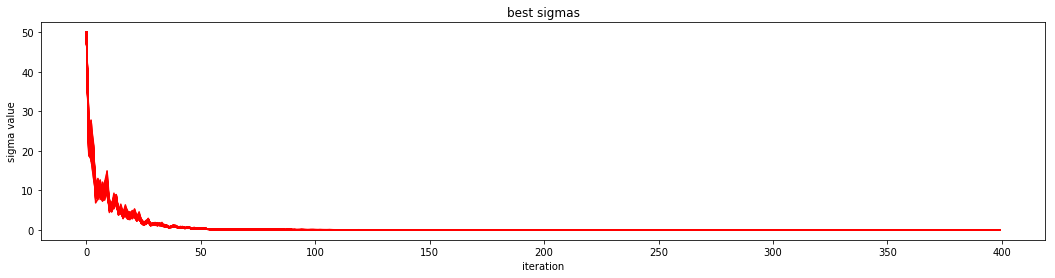

In [93]:
d = 100
N = 5000
T = 400

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 10*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Schwefela F7

Iteration 0000 : best score = -3112.61180459, mean score = -3856.80723413.
Iteration 0010 : best score = -1439.11039847, mean score = -2635.34012544.
Iteration 0020 : best score = -1248.72337600, mean score = -2417.88850893.
Iteration 0030 : best score = -1246.16059843, mean score = -2283.87597081.
Iteration 0040 : best score = -950.72683818, mean score = -2143.82057112.
Iteration 0050 : best score = -24.85240054, mean score = -180.48062028.
Iteration 0060 : best score = -0.00098253, mean score = -0.00849904.
Iteration 0070 : best score = -0.00012731, mean score = -0.00012757.
Iteration 0080 : best score = -0.00012728, mean score = -0.00012728.
Iteration 0090 : best score = -0.00012728, mean score = -0.00012728.


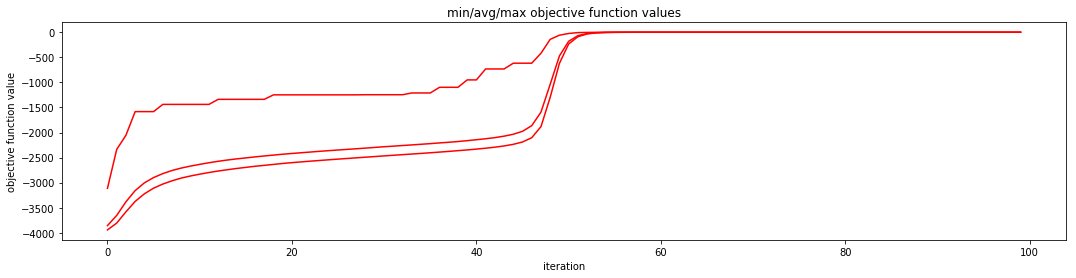

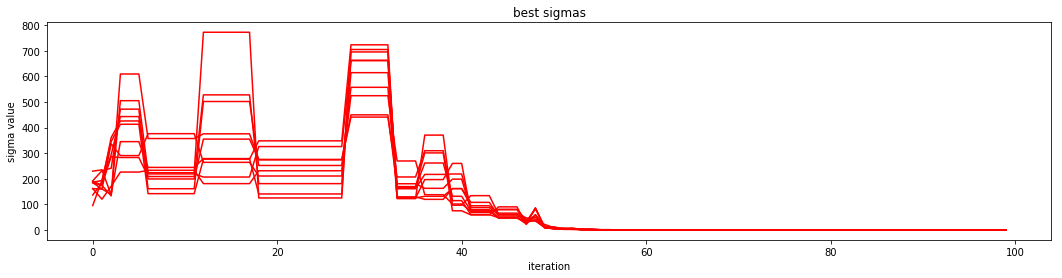

In [126]:
d = 10
N = 10000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 10*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -500, 500)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -7421.40889031, mean score = -7715.62590837.
Iteration 0010 : best score = -7107.14120247, mean score = -7107.64731411.
Iteration 0020 : best score = -7106.95846074, mean score = -7106.95869948.
Iteration 0030 : best score = -7106.95836101, mean score = -7106.95836111.
Iteration 0040 : best score = -7106.95836097, mean score = -7106.95836097.
Iteration 0050 : best score = -7106.95836097, mean score = -7106.95836097.
Iteration 0060 : best score = -7106.95836097, mean score = -7106.95836097.
Iteration 0070 : best score = -7106.95836097, mean score = -7106.95836097.
Iteration 0080 : best score = -7106.95836097, mean score = -7106.95836097.
Iteration 0090 : best score = -7106.95836097, mean score = -7106.95836097.


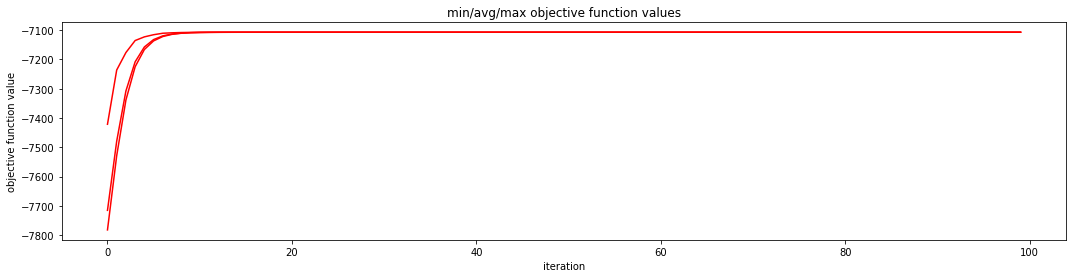

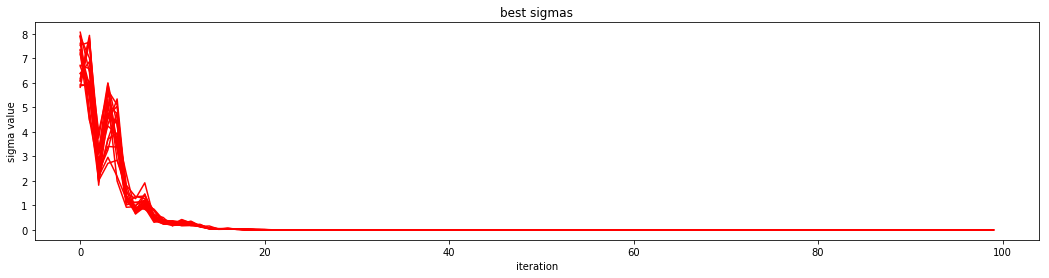

In [150]:
d = 20
N = 10000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 10*N, 2, 10.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -500, 500)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19047.70207018, mean score = -20154.51499072.
Iteration 0010 : best score = -14833.93741633, mean score = -17777.87042260.
Iteration 0020 : best score = -14833.93741633, mean score = -17260.67435154.
Iteration 0030 : best score = -14598.88514898, mean score = -17024.66035593.
Iteration 0040 : best score = -14109.05882070, mean score = -16871.74344147.
Iteration 0050 : best score = -14109.05882070, mean score = -16760.92400989.
Iteration 0060 : best score = -14109.05882070, mean score = -16673.09476057.
Iteration 0070 : best score = -14109.05882070, mean score = -16606.59221339.
Iteration 0080 : best score = -14109.05882070, mean score = -16548.44750235.
Iteration 0090 : best score = -13520.46168809, mean score = -16494.65767180.


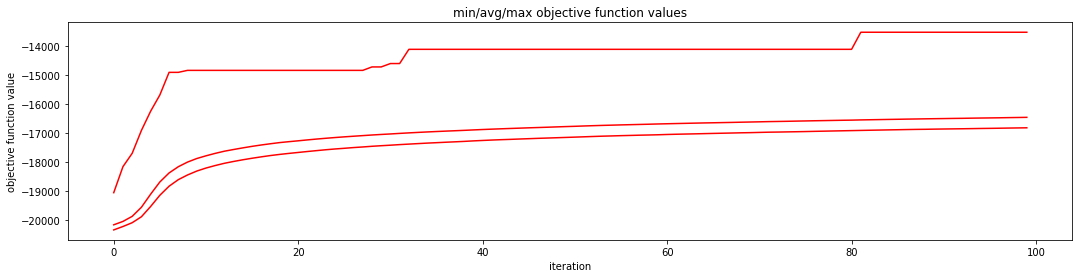

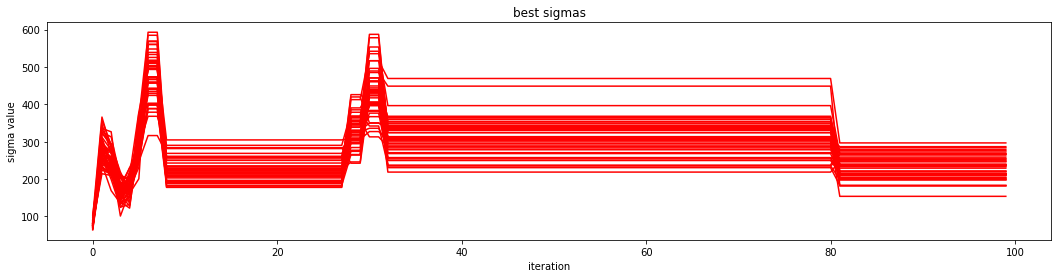

In [128]:
d = 50
N = 10000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 10*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -500, 500)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -38826.39914104, mean score = -40545.19701763.
Iteration 0010 : best score = -36401.94180250, mean score = -36663.22668801.
Iteration 0020 : best score = -35669.40664646, mean score = -35702.19251970.
Iteration 0030 : best score = -35562.07287456, mean score = -35568.49465815.
Iteration 0040 : best score = -35540.30018936, mean score = -35541.62551736.
Iteration 0050 : best score = -35535.97990281, mean score = -35536.22810919.
Iteration 0060 : best score = -35535.05041590, mean score = -35535.10783279.
Iteration 0070 : best score = -35534.84563150, mean score = -35534.85800860.
Iteration 0080 : best score = -35534.80322620, mean score = -35534.80563790.
Iteration 0090 : best score = -35534.79419572, mean score = -35534.79472569.


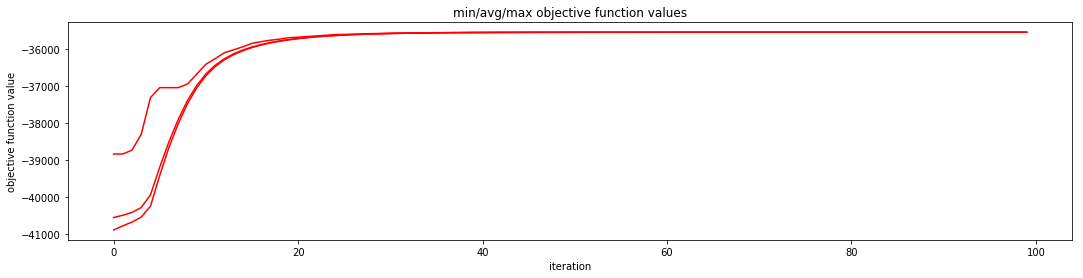

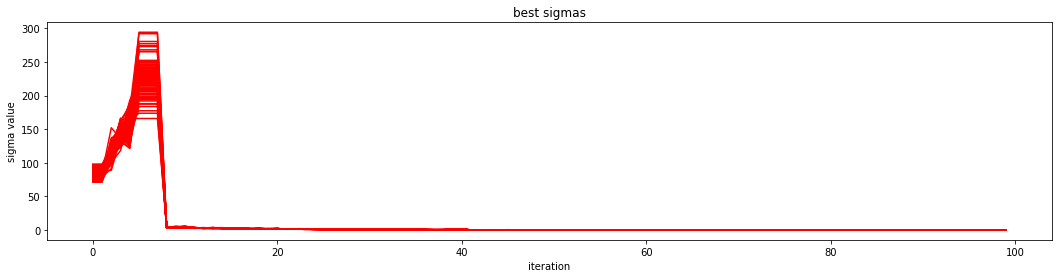

In [129]:
d = 100
N = 10000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 10*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, -500, 500)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

# Task 3

Iteration 0000 : best score = -6.20777290, mean score = -6585.25510557.
Iteration 0010 : best score = -0.16186898, mean score = -235.57253422.
Iteration 0020 : best score = -0.03730461, mean score = -83.77373462.
Iteration 0030 : best score = -0.03730461, mean score = -45.11857732.
Iteration 0040 : best score = -0.03730461, mean score = -28.12672107.
Iteration 0050 : best score = -0.03730461, mean score = -19.11178756.
Iteration 0060 : best score = -0.03424118, mean score = -13.95115802.
Iteration 0070 : best score = -0.03203511, mean score = -10.67597881.
Iteration 0080 : best score = -0.00818496, mean score = -8.42693268.
Iteration 0090 : best score = -0.00818496, mean score = -6.72771066.
Iteration 0100 : best score = -0.00818496, mean score = -5.47054642.
Iteration 0110 : best score = -0.00818496, mean score = -4.57405322.
Iteration 0120 : best score = -0.00818496, mean score = -3.86718125.
Iteration 0130 : best score = -0.00818496, mean score = -3.30762464.
Iteration 0140 : best s

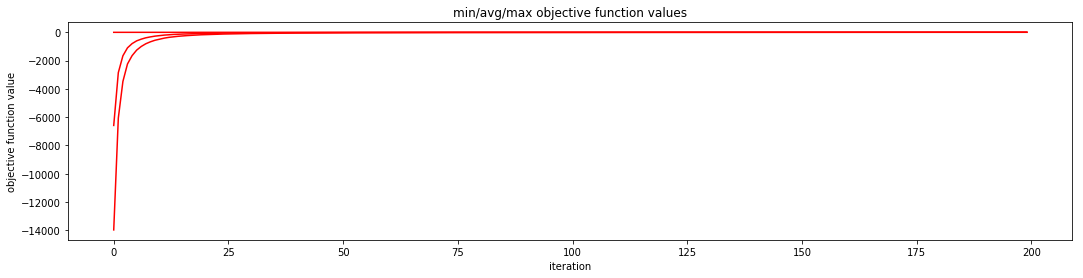

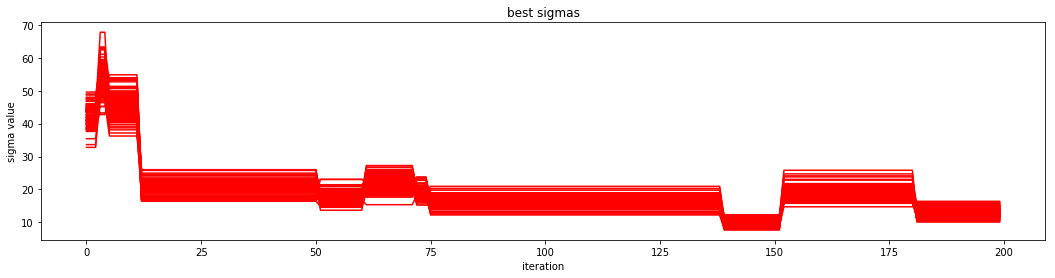

In [159]:
d = 100
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -9.47484625, mean score = -6058.08280762.
Iteration 0010 : best score = -0.02113967, mean score = -4.55733236.
Iteration 0020 : best score = -0.00073296, mean score = -0.16989027.
Iteration 0030 : best score = -0.00017851, mean score = -0.08056768.
Iteration 0040 : best score = -0.00000698, mean score = -0.05188818.
Iteration 0050 : best score = -0.00000698, mean score = -0.03909518.
Iteration 0060 : best score = -0.00000698, mean score = -0.03100115.
Iteration 0070 : best score = -0.00000698, mean score = -0.02576436.
Iteration 0080 : best score = -0.00000698, mean score = -0.02177025.
Iteration 0090 : best score = -0.00000698, mean score = -0.01875769.
Iteration 0100 : best score = -0.00000698, mean score = -0.01679548.
Iteration 0110 : best score = -0.00000698, mean score = -0.01534722.
Iteration 0120 : best score = -0.00000698, mean score = -0.01401787.
Iteration 0130 : best score = -0.00000698, mean score = -0.01278284.
Iteration 0140 : best score = -

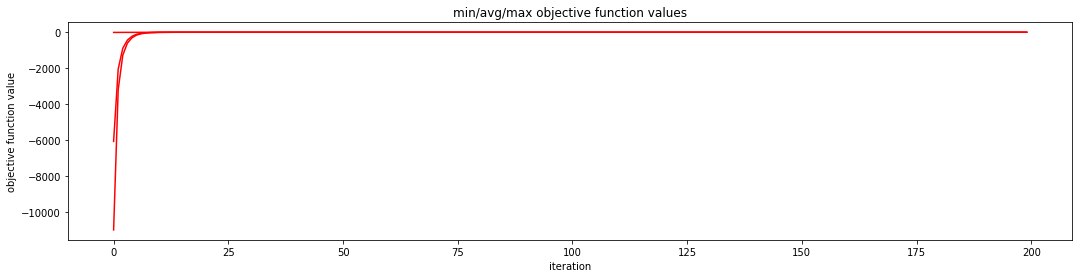

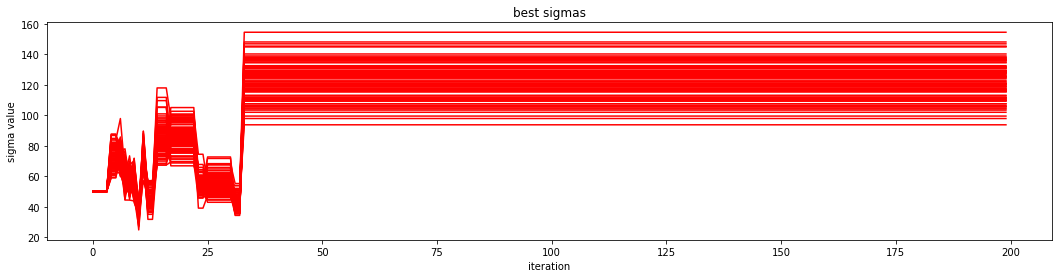

In [160]:
d = 100
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, None, None, {"type": "CONST_SIGMA", "sigma": 1.0})

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -14.78332675, mean score = -6166.02552673.
Iteration 0010 : best score = -2.01360674, mean score = -18.62849621.
Iteration 0020 : best score = -0.00001050, mean score = -0.05440803.
Iteration 0030 : best score = -0.00000073, mean score = -0.00976154.
Iteration 0040 : best score = -0.00000073, mean score = -0.00290492.
Iteration 0050 : best score = -0.00000073, mean score = -0.00102113.
Iteration 0060 : best score = -0.00000005, mean score = -0.00036489.
Iteration 0070 : best score = -0.00000005, mean score = -0.00013525.
Iteration 0080 : best score = -0.00000005, mean score = -0.00004747.
Iteration 0090 : best score = -0.00000001, mean score = -0.00001766.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000667.
Iteration 0110 : best score = -0.00000000, mean score = -0.00000238.
Iteration 0120 : best score = -0.00000000, mean score = -0.00000089.
Iteration 0130 : best score = -0.00000000, mean score = -0.00000033.
Iteration 0140 : best score =

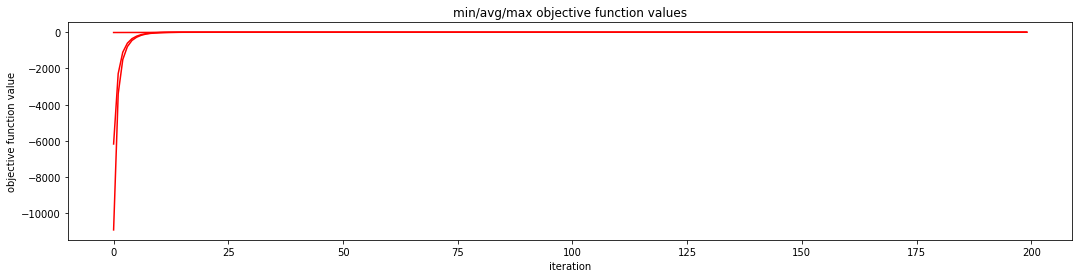

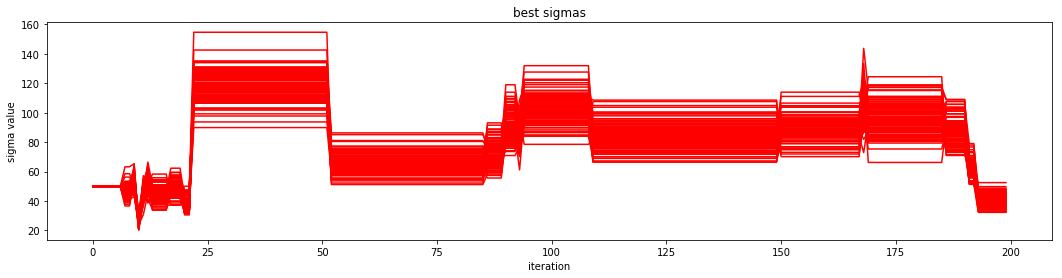

In [169]:
d = 100
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, None, None, {"type": "DECREASING_SIGMA", "sigma": 1.0, 'rate': 20.0})

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -0.07978778, mean score = -294.19126231.
Iteration 0010 : best score = -0.00417828, mean score = -5.61346986.
Iteration 0020 : best score = -0.00052640, mean score = -1.95901558.
Iteration 0030 : best score = -0.00028199, mean score = -0.98619210.
Iteration 0040 : best score = -0.00028199, mean score = -0.60465580.
Iteration 0050 : best score = -0.00011850, mean score = -0.40625687.
Iteration 0060 : best score = -0.00011850, mean score = -0.29300850.
Iteration 0070 : best score = -0.00011850, mean score = -0.21924652.
Iteration 0080 : best score = -0.00006836, mean score = -0.17042417.
Iteration 0090 : best score = -0.00006505, mean score = -0.13799397.
Iteration 0100 : best score = -0.00006505, mean score = -0.11247932.
Iteration 0110 : best score = -0.00001507, mean score = -0.09409292.
Iteration 0120 : best score = -0.00001507, mean score = -0.07954971.
Iteration 0130 : best score = -0.00001507, mean score = -0.06803812.
Iteration 0140 : best score = -0

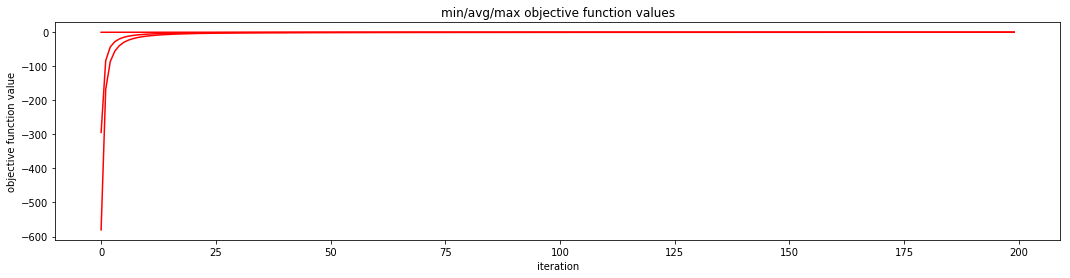

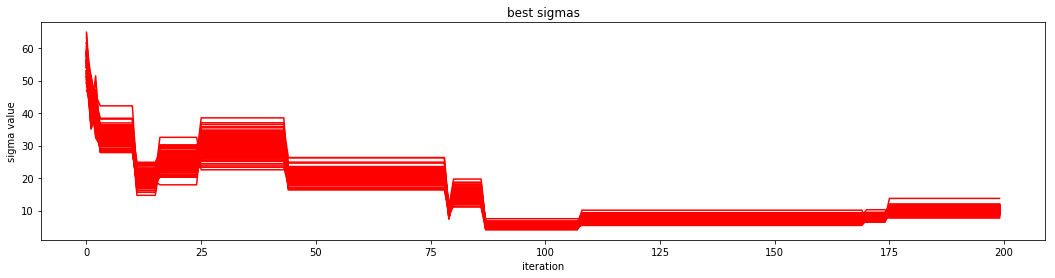

In [149]:
d = 100
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, None, None, {"type": "DECREASING_SIGMA", "sigma": 1.0, 'rate': 20.0})

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()